<img style="float: left;" src="https://desafiolatam.com/assets/home/logo-academia-bla-790873cdf66b0e681dfbe640ace8a602f5330bec301c409744c358330e823ae3.png">


## <center>  Ayudantía - Comparación Estadistica Clasica vs Machine Learling

### Wilson Mejías Caballero
------------------------------------

## Problema 1: Ventas y medios

### Introducción

El conjunto de datos contiene información sobre el dinero gastado en publicidad y sus ventas generadas. El dinero se gastó en anuncios de televisión, radio y periódicos.
El objetivo es utilizar la regresión lineal para comprender cómo el gasto en publicidad impacta las ventas.

In [1]:
#Importar librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

#Configuración de graficos
plt.style.use('ggplot')

#Ignorar Avisos
import warnings
warnings.filterwarnings("ignore")

#Regresión clasica
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf


#RegresiónLineal Machine 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
# Carga de data

df = pd.read_csv("Advertising.csv")

In [3]:
# Revisión de DF
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


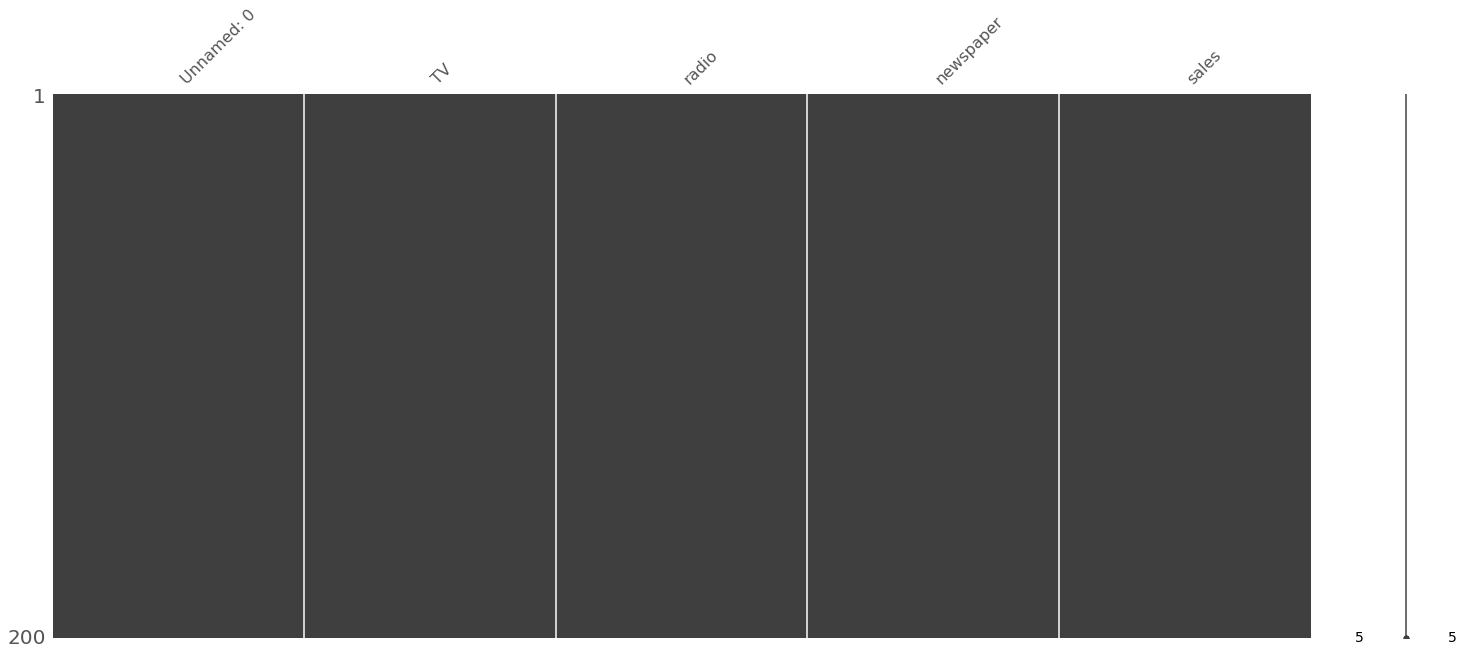

In [5]:
missingno.matrix(df)


In [6]:
#Eliminar columna

df=df.drop(['Unnamed: 0'], axis=1)

In [7]:
#Función para graficar variables en un Data Frame

def explor (df):
    for n, i in enumerate(df):
        plt.subplot((len(list(df.columns))/3)+1,3,n+1)
        if df[i].dtypes ==float:
            sns.distplot(df[i])
            plt.title(i)
            plt.xlabel("")
        elif df[i].dtypes =="object":
            sns.countplot(df[i])
            plt.title(i)
            plt.xlabel("")
        else:
            sns.distplot(df[i],kde=False)
            plt.title(i)
            plt.xlabel("")
    plt.tight_layout()

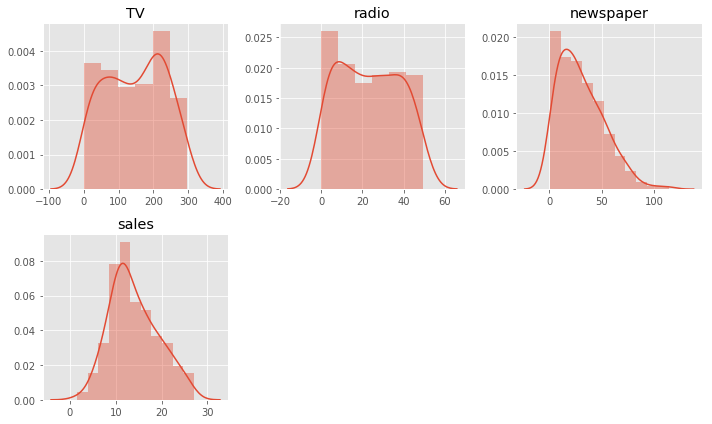

In [8]:
#Graficar Variables

plt.rcParams['figure.figsize'] = (10, 6)
explor(df)

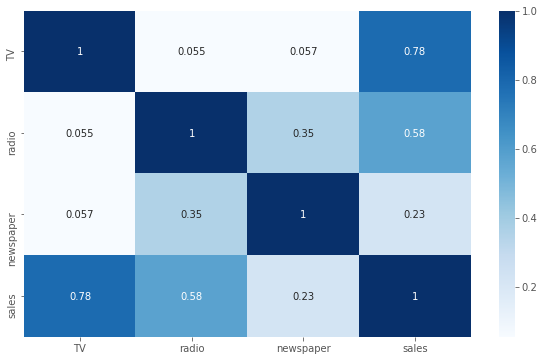

In [9]:
#Nivel de Asoción entre variables

sns.heatmap(df.corr( method='pearson'), annot=True, cmap="Blues")

In [10]:
#Función regresión

def multireg(y, df,no_lineal=False):
    df_temp=df.drop(y, axis=1)
    
    if no_lineal=="logistico":
        for n, i in enumerate(df_temp):
            plt.subplot((len(list(df_temp.columns))/3)+1,3,n+1)
            sns.regplot(y=df[y] ,x= df_temp[i],logistic=True,marker="+")
            plt.title(i)
            plt.xlabel("")          
    elif no_lineal=="logaritmo":
        for n, i in enumerate(df_temp):
            plt.subplot((len(list(df_temp.columns))/3)+1,3,n+1)
            sns.regplot(y=df[y] ,x= df_temp[i],logx=True ,marker="+")
            plt.title(i)
            plt.xlabel("")
            
    elif no_lineal=="lowess":
        for n, i in enumerate(df_temp):
            plt.subplot((len(list(df_temp.columns))/3)+1,3,n+1)
            sns.regplot(y=df[y] ,x= df_temp[i],lowess=True,marker="+", color="blue")
            plt.title(i)
            plt.xlabel("")   
            
    else :
        for n, i in enumerate(df_temp):
            plt.subplot((len(list(df_temp.columns))/3)+1,3,n+1)
            sns.regplot(y=df[y] ,x= df_temp[i],marker="+",color="green")
            plt.title(i)
            plt.xlabel("")
            
    plt.tight_layout()

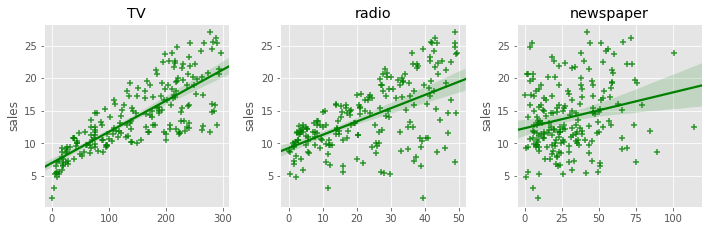

In [11]:
plt.rcParams['figure.figsize'] = (10, 6)
multireg("sales", df)

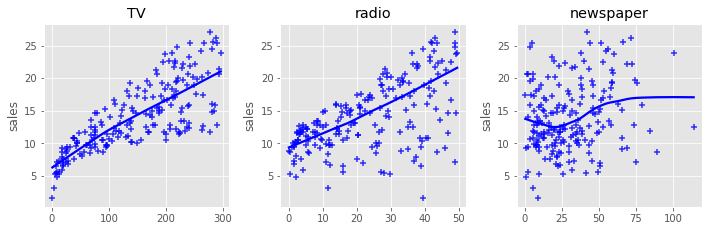

In [12]:
plt.rcParams['figure.figsize'] = (10, 6)
multireg("sales", df, no_lineal="lowess")

In [13]:
#Separación de la data para pruebas

(x_train,x_test,y_train,y_test)=train_test_split(
    df.drop("sales",axis=1) ,df["sales"], test_size=0.33, random_state=17285)

In [14]:
#Ahora generemos una función llamada report_scores que ingrese como argumentos 

def report_scores (y_hat, y_test):
    mse=mean_squared_error(y_test, y_hat).round(2)
    r2=r2_score(y_test, y_hat).round(2)
    print("Scores del Modelo")
    print("Mean Squared Error: ", mse)
    print("R-cuadrado: ", r2)

In [15]:
y_train.head()

137    20.8
180    10.5
73     11.0
81     12.3
48     14.8
Name: sales, dtype: float64

## Modelo Lineal desde Estadistica Clasica


In [16]:
#Modelo Saturado -> tomo todas las variables que tengo

df_clasic=pd.DataFrame()
df_clasic=pd.concat([x_train,df_clasic])
df_clasic['sales']=y_train

model = ols('sales ~ TV + radio+ newspaper', data=df_clasic).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     327.2
Date:                Wed, 28 Aug 2019   Prob (F-statistic):           2.28e-60
Time:                        20:31:25   Log-Likelihood:                -264.63
No. Observations:                 134   AIC:                             537.3
Df Residuals:                     130   BIC:                             548.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2214      0.378      8.529      0.000       2.474       3.969
TV             0.0470      0.002     24.580      0.000       0.043       0.051
radio          0.1807      0.011     16.880      0.000       0.159       0.202
newspaper     -0.0068      0.008     -0.902      0.369      -0.022       0.008
==============================================================================
Omnibus:                       49.686   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.653
Skew:                          -1.475   Prob(JB):                     1.16e-28
Kurtosis:                       6.786   Cond. No.                         398.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
report_scores(model.predict(x_test), y_test)

Scores del Modelo
Mean Squared Error:  2.44
R-cuadrado:  0.91


In [18]:
#Modelo depurado

model = ols('sales ~ TV + radio', data=df_clasic).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     491.0
Date:                Wed, 28 Aug 2019   Prob (F-statistic):           1.36e-61
Time:                        20:31:25   Log-Likelihood:                -265.05
No. Observations:                 134   AIC:                             536.1
Df Residuals:                     131   BIC:                             544.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1262      0.362      8.626      0.000       2.409       3.843
TV             0.0467      0.002     24.722      0.000       0.043       0.050
radio          0.1772      0.010     17.723      0.000       0.157       0.197
==============================================================================
Omnibus:                       47.693   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.788
Skew:                          -1.450   Prob(JB):                     1.19e-25
Kurtosis:                       6.486   Cond. No.                         376.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
report_scores(model.predict(x_test), y_test)

Scores del Modelo
Mean Squared Error:  2.35
R-cuadrado:  0.91


## Modelo Lineal desde Machine Learling




In [20]:
#Instanciar modelo

machine_reg = LinearRegression(fit_intercept=False)

#Ajustar modelo

machine_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [21]:
report_scores(machine_reg.predict(x_test), y_test)

Scores del Modelo
Mean Squared Error:  2.95
R-cuadrado:  0.89


In [22]:
#Ajuste de Hiperparametros

machine_reg = LinearRegression()

#Grilla de busqueda

grilla_parametro={"fit_intercept":[True , False],"normalize":[True , False]}

Grilla=GridSearchCV(machine_reg, param_grid=grilla_parametro, n_jobs=-1, cv=3)

In [23]:
Grilla.fit(x_train, y_train)

/Users/luisalfredoporraspaez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
Grilla.best_params_

{'fit_intercept': True, 'normalize': True}

In [25]:
#Instanciar modelo

machine_reg_best = LinearRegression(fit_intercept=True, normalize=True )

#Ajustar modelo

machine_reg_best.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [26]:
report_scores(machine_reg_best.predict(x_test), y_test)

Scores del Modelo
Mean Squared Error:  2.44
R-cuadrado:  0.91


In [58]:
machine_reg_best.coef_

array([ 0.04698815,  0.18065863, -0.00679921])

In [59]:
machine_reg_best.intercept_

3.221420062273202

## Problema 2: Titanic

### Introducción

El objetivo de este ejercicio es encontrar un modelo que prediga si un pasajero puede sobrecvivir utilizando las variables del DF.

- PassengerId: correlativo del pasagero
- Pclass: Calse del ticket
- Survived: Variable de Sobrevivencia
- Name: Nombre del pasajero
- Sex: Sexo del pasajero
- Age: Edad del pasajero
- SibSp: Número de hijos/esposos abordo
- Parch: Núde padres / hijos a bordo del Titanic
- Ticket: Númeración del ticket
- Fare: Tarifa del ticket
- Cabin: Número de Cabina
- Embarked: Puerto de embarque

In [29]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.shape

(891, 12)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


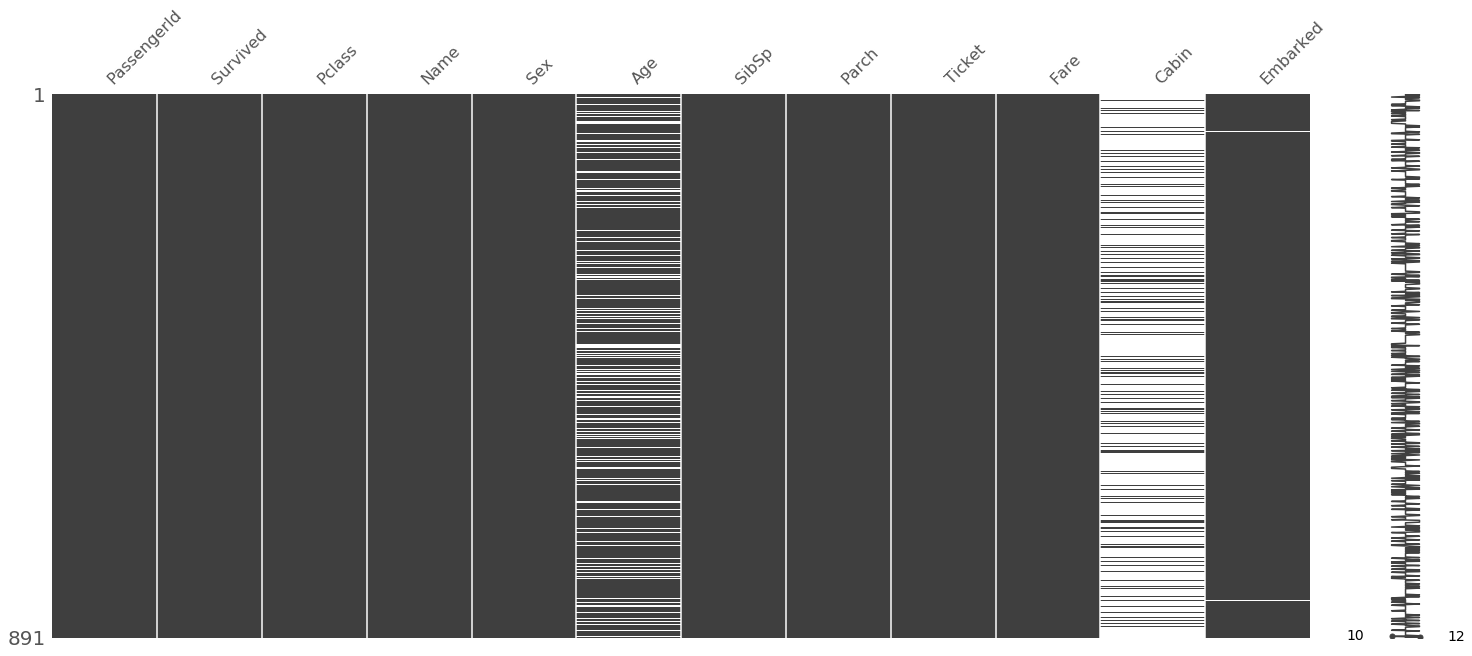

In [32]:
#Revisión NA
missingno.matrix(df)

In [33]:
#Eliminación de columnas con NA

df_drop=df.drop(['Age','Cabin','Name','Ticket','PassengerId'], axis=1)

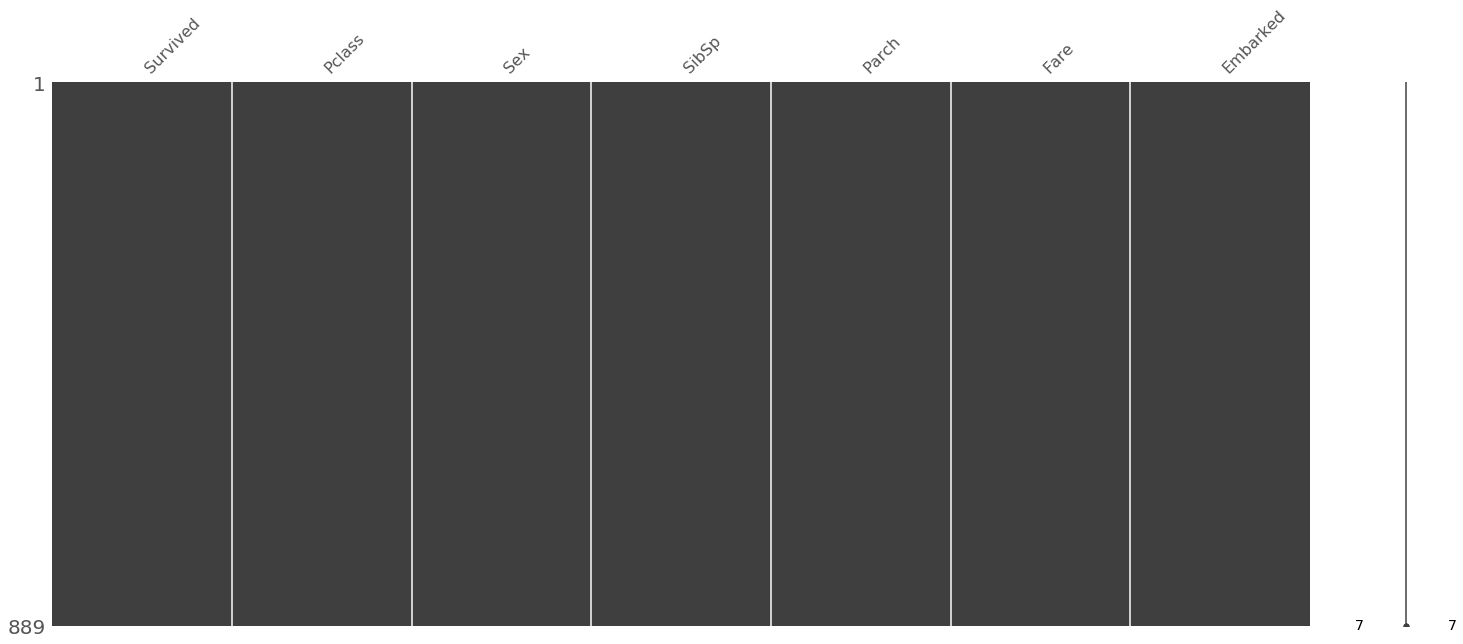

In [34]:
df_drop=df_drop.dropna()
missingno.matrix(df_drop)

In [35]:
df_drop.shape

(889, 7)

In [36]:
df_drop['Survived']=df_drop['Survived'].astype(str)
df_drop['Pclass']=df_drop['Pclass'].astype(str)

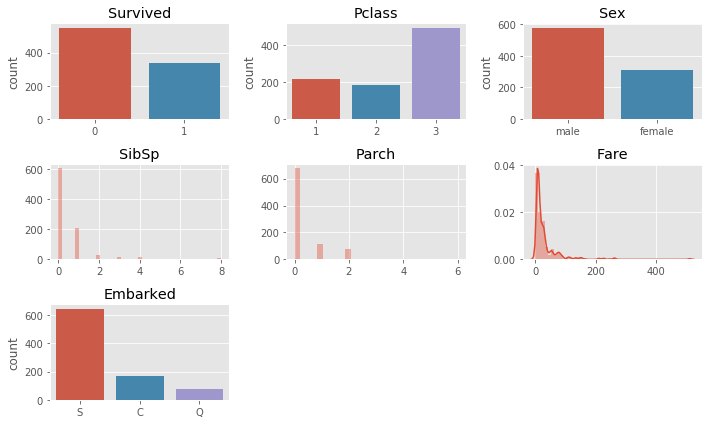

In [37]:
explor(df_drop)

In [38]:
#Realizamos graficos para ver diferencias entre valores

def df_boxplot (df):
    
    categorica=[]
    numerica=[]
    
    for n, i in enumerate(df):
        if (df[i].dtypes =="object"):
            categorica.append(i)
        else:
            numerica.append(i)
            
    print("Las variables numericas son {}".format(numerica))
    print("Las variables cateroricas son {}".format(categorica))    
    
    n=1
    for i in categorica:
        for j in numerica:
            plt.subplot((len(list(df.columns))/3)+2,3,n)
            ax=sns.boxplot(x=i, y=j ,data=df)
            n+=1
    plt.tight_layout()

Las variables numericas son ['SibSp', 'Parch', 'Fare']
Las variables cateroricas son ['Survived', 'Pclass', 'Sex', 'Embarked']


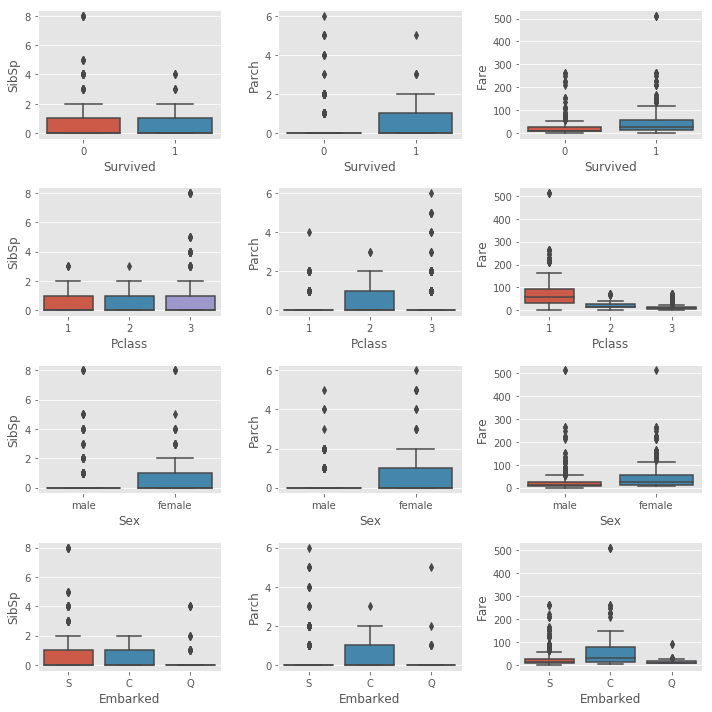

In [39]:
plt.rcParams['figure.figsize'] = (10, 10)
df_boxplot (df_drop)

In [40]:
#Binarizar las variables

#Variables a dummificar

variables=[]

for n, i in enumerate(df_drop.columns):
    if df_drop[i].dtypes ==np.object and i !='Survived':
        variables.append(i)

df_dumm=pd.get_dummies(data=df_drop, columns=variables, prefix=variables,drop_first=True)

In [41]:
df_dumm.head()

,Survived,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,7.2500,0,1,1,0,1
1,1,1,0,71.2833,0,0,0,0,0
2,1,0,0,7.9250,0,1,0,0,1
3,1,1,0,53.1000,0,0,0,0,1
4,0,0,0,8.0500,0,1,1,0,1


In [42]:
df_dumm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived      889 non-null object
SibSp         889 non-null int64
Parch         889 non-null int64
Fare          889 non-null float64
Pclass_2      889 non-null uint8
Pclass_3      889 non-null uint8
Sex_male      889 non-null uint8
Embarked_Q    889 non-null uint8
Embarked_S    889 non-null uint8
dtypes: float64(1), int64(2), object(1), uint8(5)
memory usage: 79.1+ KB


In [43]:
for i in df_dumm:
    df_dumm[i]=df_dumm[i].astype(float)

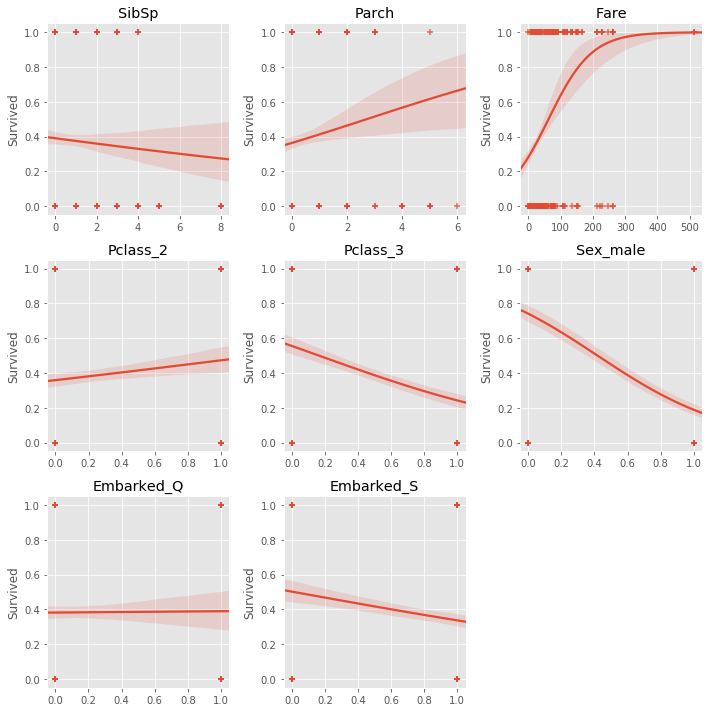

In [44]:
#Relación de la variable objetivo con el resto

multireg("Survived",df_dumm,no_lineal="logistico")

In [45]:
#Separación de la data para pruebas

(x_train,x_test,y_train,y_test)=train_test_split(
    df_dumm.drop("Survived",axis=1) ,df_dumm["Survived"], test_size=0.33, random_state=17285)

### Modelo Logistico Clasico

In [46]:
#Estimación del modelo saturado

df_clasic=pd.DataFrame()
df_clasic=pd.concat([x_train,df_clasic])
df_clasic['Survived']=y_train


m1_logit=smf.logit('Survived~SibSp+Parch+Fare+Pclass_2+Pclass_3+Sex_male+Embarked_Q+Embarked_S',df_clasic).fit()
m1_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.465826
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.309     
Dependent Variable: Survived         AIC:              572.3325  
Date:               2019-08-28 20:31 BIC:              611.8296  
No. Observations:   595              Log-Likelihood:   -277.17   
Df Model:           8                LL-Null:          -401.24   
Df Residuals:       586              LLR p-value:      4.2596e-49
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     2.3760    0.4165    5.7039  0.0000   1.5595   3.1924
SibSp        -0.2722    0.1245   -2.1873  0.0287  -0.5162  -0.0283
Parch        -0.0956    0.1334   -0.7167  0.4735  -0.3571   0.1659
Fare          0.0054    0.0034    1.5513  0.1208  -0.0014   0.0121
Pclass_2     -0.3826    0.3451   -1.1089  0.2675  -1.0589   0.2937
Pclass_3     -1.4621    0.3347   -4.3687  0.0000  -2.1180  -0.8061
Sex_male     -2.5993    0.2363  -10.9990  0.0000  -3.0625  -2.1362
Embarked_Q    0.2373    0.4748    0.4997  0.6173  -0.6933   1.1678
Embarked_S   -0.4865    0.2824   -1.7230  0.0849  -1.0399   0.0669
=================================================================

"""

In [47]:
m2_logit=smf.logit('Survived~Pclass_3+Sex_male',df_clasic).fit()
m2_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.486346
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.279     
Dependent Variable: Survived         AIC:              584.7523  
Date:               2019-08-28 20:31 BIC:              597.9180  
No. Observations:   595              Log-Likelihood:   -289.38   
Df Model:           2                LL-Null:          -401.24   
Df Residuals:       592              LLR p-value:      2.6220e-49
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     1.8660    0.2109    8.8463  0.0000   1.4525   2.2794
Pclass_3     -1.4656    0.2121   -6.9087  0.0000  -1.8814  -1.0498
Sex_male     -2.4884    0.2167  -11.4810  0.0000  -2.9133  -2.0636
=================================================================

"""

### Modelo Logistico Machine Learnig

In [48]:
#Instancia del Modelo

logistic_machine = LogisticRegression()


In [49]:
#Entrenamiento

logistic_machine.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
#Grilla de busqueda

logistic_machine1= LogisticRegression(random_state=17285)

params_log = {'penalty' : ['l1', 'l2'],'C' : [0.001, 0.01, 0.1, 1,10, 100, 1000, 10000],
              'fit_intercept':[True,False]}

Grilla=GridSearchCV(logistic_machine1, param_grid=params_log, n_jobs=-1, cv=3).fit(x_train, y_train)

In [51]:
Grilla.best_params_

{'C': 0.1, 'fit_intercept': True, 'penalty': 'l2'}

In [52]:
#Instancia del Modelo mejorado

logistic_machine_best = LogisticRegression(C=0.1, penalty= 'l2',fit_intercept=True)

In [53]:
#Entrenamiento Mejor

logistic_machine_best.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
def invlogit(x):
    estimate_y = 1 / (1+np.exp(-x))
    return (estimate_y)

In [55]:
#Importar curva Roc

from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Auc del modelo: m1_logit es 0.85
Auc del modelo: m2_logit es 0.84
Auc del modelo: logistic_machine es 0.85
Auc del modelo: logistic_machine_best es 0.83


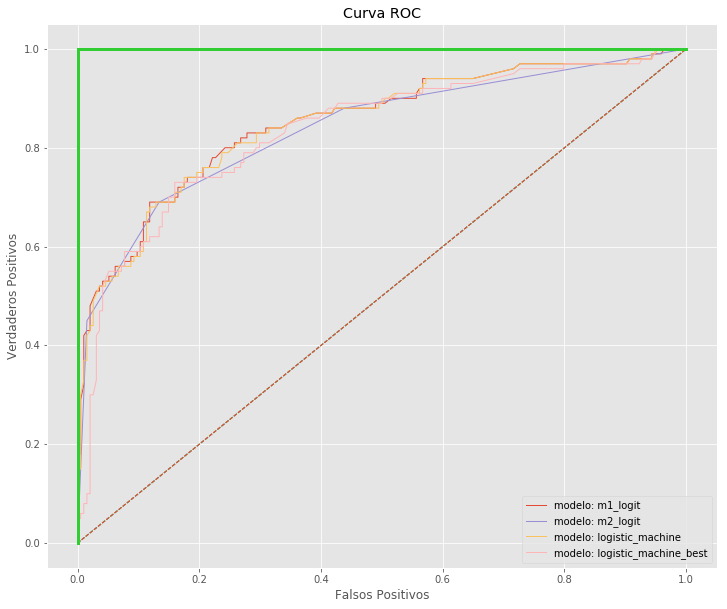

In [56]:
#Curva ROC

plt.rcParams['figure.figsize'] = (12, 10)


modelos=[m1_logit, m2_logit, logistic_machine, logistic_machine_best]

nombres=['m1_logit', 'm2_logit', 'logistic_machine', 'logistic_machine_best']

y_hats=[]
indicador1=[]
indicador2=[]
indicador3=[]


for i in range(len(modelos)):
    if i==2 or i==3:
        y_hats.append(modelos[i].predict_proba(x_test)[:,1])
    else:
        y_hats.append(modelos[i].predict(x_test))
    false_positive, true_positive, threshold = roc_curve(y_test, y_hats [i])
    indicador1.append(false_positive)
    indicador2.append(true_positive)
    indicador3.append(threshold)
    print("Auc del modelo: {} es {}".format(nombres[i],roc_auc_score(y_test, y_hats [i]).round(2)))

#Plot curva ROC

plt.title('Curva ROC')
for i in range(len(modelos)): 
    plt.plot(indicador1[i], indicador2[i], lw=1, label="modelo: {}".format(nombres[i]) )
    plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');
plt.legend()

In [57]:
#Metricas de Clasifificación

for i in range(4):
    print("==================== {} ======================".format(nombres[i]))
    if i==2 or i==3:
        print(classification_report(y_test, modelos[i].predict(x_test)))
    else:
        print(classification_report(y_test, np.where(modelos[i].predict(x_test)>0.5,1,0)))

==================== m1_logit ======================
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       194
         1.0       0.72      0.69      0.70       100

   micro avg       0.80      0.80      0.80       294
   macro avg       0.78      0.78      0.78       294
weighted avg       0.80      0.80      0.80       294

==================== m2_logit ======================
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       194
         1.0       0.73      0.69      0.71       100

   micro avg       0.81      0.81      0.81       294
   macro avg       0.79      0.78      0.78       294
weighted avg       0.80      0.81      0.80       294

==================== logistic_machine ======================
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86       194
         1.0       0.73      0.69      0.71       100

   micro avg   